# Imports

In [32]:
import keras #High level interface of TensorFlow
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import InputLayer
from keras.layers.core import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.layers.convolutional import *
import numpy as np 
import matplotlib.pyplot as plt
import tensorflowjs as tfjs
from PIL import Image
from keras.optimizers import RMSprop

# Image preprocessing

In [33]:
train_path='../dataset2/train'
valid_path='../dataset2/valid'

In [35]:
batch_size = 24 #Every batch contains data from 16 different images 
#Data Augmentation
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(200, 200),  
        batch_size=batch_size,)  
valid_set = train_datagen.flow_from_directory(
        valid_path,
        target_size=(200, 200),  
        batch_size=batch_size,)  


Found 3274 images belonging to 40 classes.
Found 1275 images belonging to 40 classes.


# Creating a model

In [36]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200,200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #first block, frozen

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #third block, frozen

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #fourth block, frozen

model.add(Flatten()) #Stream data to "nodes" of the ANN
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25)) #Dropping out some data
model.add(Dense(40))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
activation_19 (Activation)   (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 64)        18496     
__________

In [37]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Training

In [38]:
model.fit_generator(train_set,
                    steps_per_epoch = 3274//batch_size, #1000/32 numbers of batches per epoch
                    epochs = 50,
                    validation_data = valid_set,
                    validation_steps = 1275//batch_size )
                   
        
                 

Epoch 1/50
136/136 [==============================] - 255s 2s/step - loss: 3.4220 - acc: 0.1737 - val_loss: 3.3058 - val_acc: 0.1643
Epoch 2/50
136/136 [==============================] - 246s 2s/step - loss: 2.7438 - acc: 0.3350 - val_loss: 2.6142 - val_acc: 0.3181
Epoch 3/50
136/136 [==============================] - 239s 2s/step - loss: 2.3670 - acc: 0.4073 - val_loss: 2.2875 - val_acc: 0.3877
Epoch 4/50
136/136 [==============================] - 243s 2s/step - loss: 2.0782 - acc: 0.4614 - val_loss: 2.0578 - val_acc: 0.4668
Epoch 5/50
136/136 [==============================] - 243s 2s/step - loss: 1.8233 - acc: 0.5153 - val_loss: 1.7936 - val_acc: 0.5308
Epoch 6/50
136/136 [==============================] - 236s 2s/step - loss: 1.6545 - acc: 0.5604 - val_loss: 1.8258 - val_acc: 0.5092
Epoch 7/50
136/136 [==============================] - 240s 2s/step - loss: 1.5258 - acc: 0.5806 - val_loss: 1.2931 - val_acc: 0.6451
Epoch 8/50
136/136 [==============================] - 242s 2s/step - 

In [26]:
#model.save("models/model_200x200.h5")
tfjs.converters.save_keras_model(model, './models/model_40.json')
print("Saved")

Saved


In [39]:
valid_set.class_indices

{'Faces': 0,
 'Leopards': 1,
 'accordion': 2,
 'barrel': 3,
 'binocular': 4,
 'buddha': 5,
 'butterfly': 6,
 'camera': 7,
 'cougar_body': 8,
 'cougar_face': 9,
 'crab': 10,
 'crayfish': 11,
 'crocodile': 12,
 'dalmatian': 13,
 'grand_piano': 14,
 'hawksbill': 15,
 'headphone': 16,
 'hedgehog': 17,
 'helicopter': 18,
 'ibis': 19,
 'inline_skate': 20,
 'joshua_tree': 21,
 'ketch': 22,
 'lamp': 23,
 'laptop': 24,
 'menorah': 25,
 'metronome': 26,
 'minaret': 27,
 'pigeon': 28,
 'pizza': 29,
 'scissors': 30,
 'soccer_ball': 31,
 'stegosaurus': 32,
 'stop_sign': 33,
 'strawberry': 34,
 'sunflower': 35,
 'tick': 36,
 'trilobite': 37,
 'umbrella': 38,
 'watch': 39}

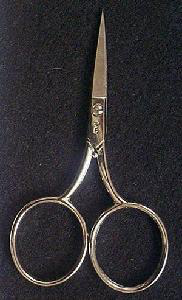

In [52]:
image = Image.open("PersonalTestSet/image_0039.jpg")
image

In [53]:
def preprocess_img(img,target_size):
    img = img.resize(target_size)
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    return img

In [54]:
preprocessed_image = preprocess_img(image,target_size=(200,200))

In [55]:
predictions = model.predict_classes(preprocessed_image)
predictions

array([30], dtype=int64)